In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
# data frame all tracks with features from 1921-2020
df = pd.read_csv('data/music_with_genres.csv').drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(101656, 22)


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,track_id,artist_id,genre,is_pop
0,0.511,['Elton John'],0.436,380667,0.429,0,0.000103,3,0.104,-10.884,1,My Father's Gun,29,1970-10-30,0.0319,119.025,0.223,1970,2AgMTn4RyRrI1uc3iXx4Xq,3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock', 'so...",False
1,0.465,['Three Dog Night'],0.629,166707,0.376,0,0.000000,7,0.235,-13.934,1,It Ain't Easy,26,1970-01-01,0.0337,76.848,0.347,1970,2hKxnhi2Eb3443AQbOnqNl,4FAEZeJcsYYBkNq2D3KGTV,"['album rock', 'art rock', 'blues rock', 'bril...",True
2,0.166,['Martha Reeves & The Vandellas'],0.417,176573,0.753,0,0.000000,9,0.269,-10.204,0,I Should Be Proud,33,1970,0.1260,178.408,0.794,1970,2nxSAQBvF6gDIwZmG6B9nO,1Pe5hlKMCTULjosqZ6KanP,"['brill building pop', 'classic girl group', '...",True
3,0.990,['Vashti Bunyan'],0.600,141893,0.107,0,0.011400,0,0.101,-19.189,0,Where I Like To Stand,26,1970,0.0525,117.630,0.732,1970,2vNuzzaFEPY2WGdYFhdeui,4chuPfKtATDZvbRLExsTp2,"['anti-folk', 'british folk', 'folk', 'freak f...",False
4,0.639,['Ry Cooder'],0.568,134067,0.434,0,0.626000,7,0.229,-14.170,1,Available Space,35,1970-01-01,0.0379,147.388,0.694,1970,439kdOcVhEp5gQ67eYNkKG,1CPwHx5lgVxv0rfcp7UXLx,"['blues', 'blues rock', 'country blues', 'coun...",False


## Notable Correlations ##

In [11]:
# check which features have notable correlations
temp.corr()[(temp.corr() <= -0.3) | (temp.corr() >= 0.3)]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,NaN,NaN,-0.698513,NaN,NaN,NaN,NaN,-0.548065,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.515564,NaN
duration_ms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,-0.698513,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.747830,NaN,NaN,NaN,NaN,0.320899,NaN
explicit,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.466648,NaN,NaN,0.330890
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.399432,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,-0.548065,NaN,NaN,0.747830,NaN,-0.399432,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.343870
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Some notable correlations/relationships:
- as the accousticness of a track increases, loudness decreases moderately and energy decreases strongly
- as danceability increases, valence tends to increases moderately
- as the energy of a track increases, the loudness of the track tends to increase strongly
- as energy of a track increases, valence increases somewhat
- as instrumentalness increases, loudness decreases somewhat
- there is a strong relationship between popularity and release year (newer songs tend to be more popular)
- there is moderate relationship between explicitness and speechiness of a track
- there is somewhat of a relationship between explicitness and release year of a track
- there is somewhat of a relationship between loudness and release year

This may be a sign of how the clusters will form.

# Initial Models #

In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, linkage

## Preprocessing ##

### All Tracks ###

In [13]:
# continuous numerical features
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                'popularity', 'speechiness', 'tempo', 'valence']

# cateogrical features
cat_features = ['explicit', 'key', 'mode', 'year']

# separate numerical features and categorical features for scaling, and set track_id as index
num_df = df.set_index('track_id')[num_features]
cat_df = df.set_index('track_id')[cat_features]

In [14]:
# scale the numerical data to be between 0 and 1 since most of the features are already in that range 
scaler = MinMaxScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(num_df)
# create new data frame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=num_df.index, columns=num_df.columns)
# merge scaled features with the categorical features
model_df = scaled_df.merge(cat_df, left_index=True, right_index=True)

Due to the limitations of my computer, I may have to reduce the amount of data I am working with. Below I use a subset of the data that only includes tracks that are potentially pop songs based on the genres associated with the track's artist.

### Just Pop Tracks ###

In [16]:
# just use tracks that can potentially be pop songs
pop_df = df[df.is_pop == True]

In [17]:
# separate numerical vs categorical features
num_df2 = pop_df.set_index('track_id')[num_features]
cat_df2 = pop_df.set_index('track_id')[cat_features]
# scale the numerical data to be between 0 and 1 since most of the features are already in that range 
scaler = MinMaxScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(num_df2)
# create new data frame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=num_df2.index, columns=num_df2.columns)
# merge scaled features with the categorical features
model_df_pop = scaled_df.merge(cat_df2, left_index=True, right_index=True)

## Initial Model: Hierarchical Clustering ##

Since the goal of clustering is to find different subgroups of pop, I believe the best algorithm to use is an hierarchical one since it will give me subclusters. Below we do this.

In [19]:
# construct dendogram in scipy, link with 'ward' linkage
Z = linkage(model_df_pop, method = 'ward')

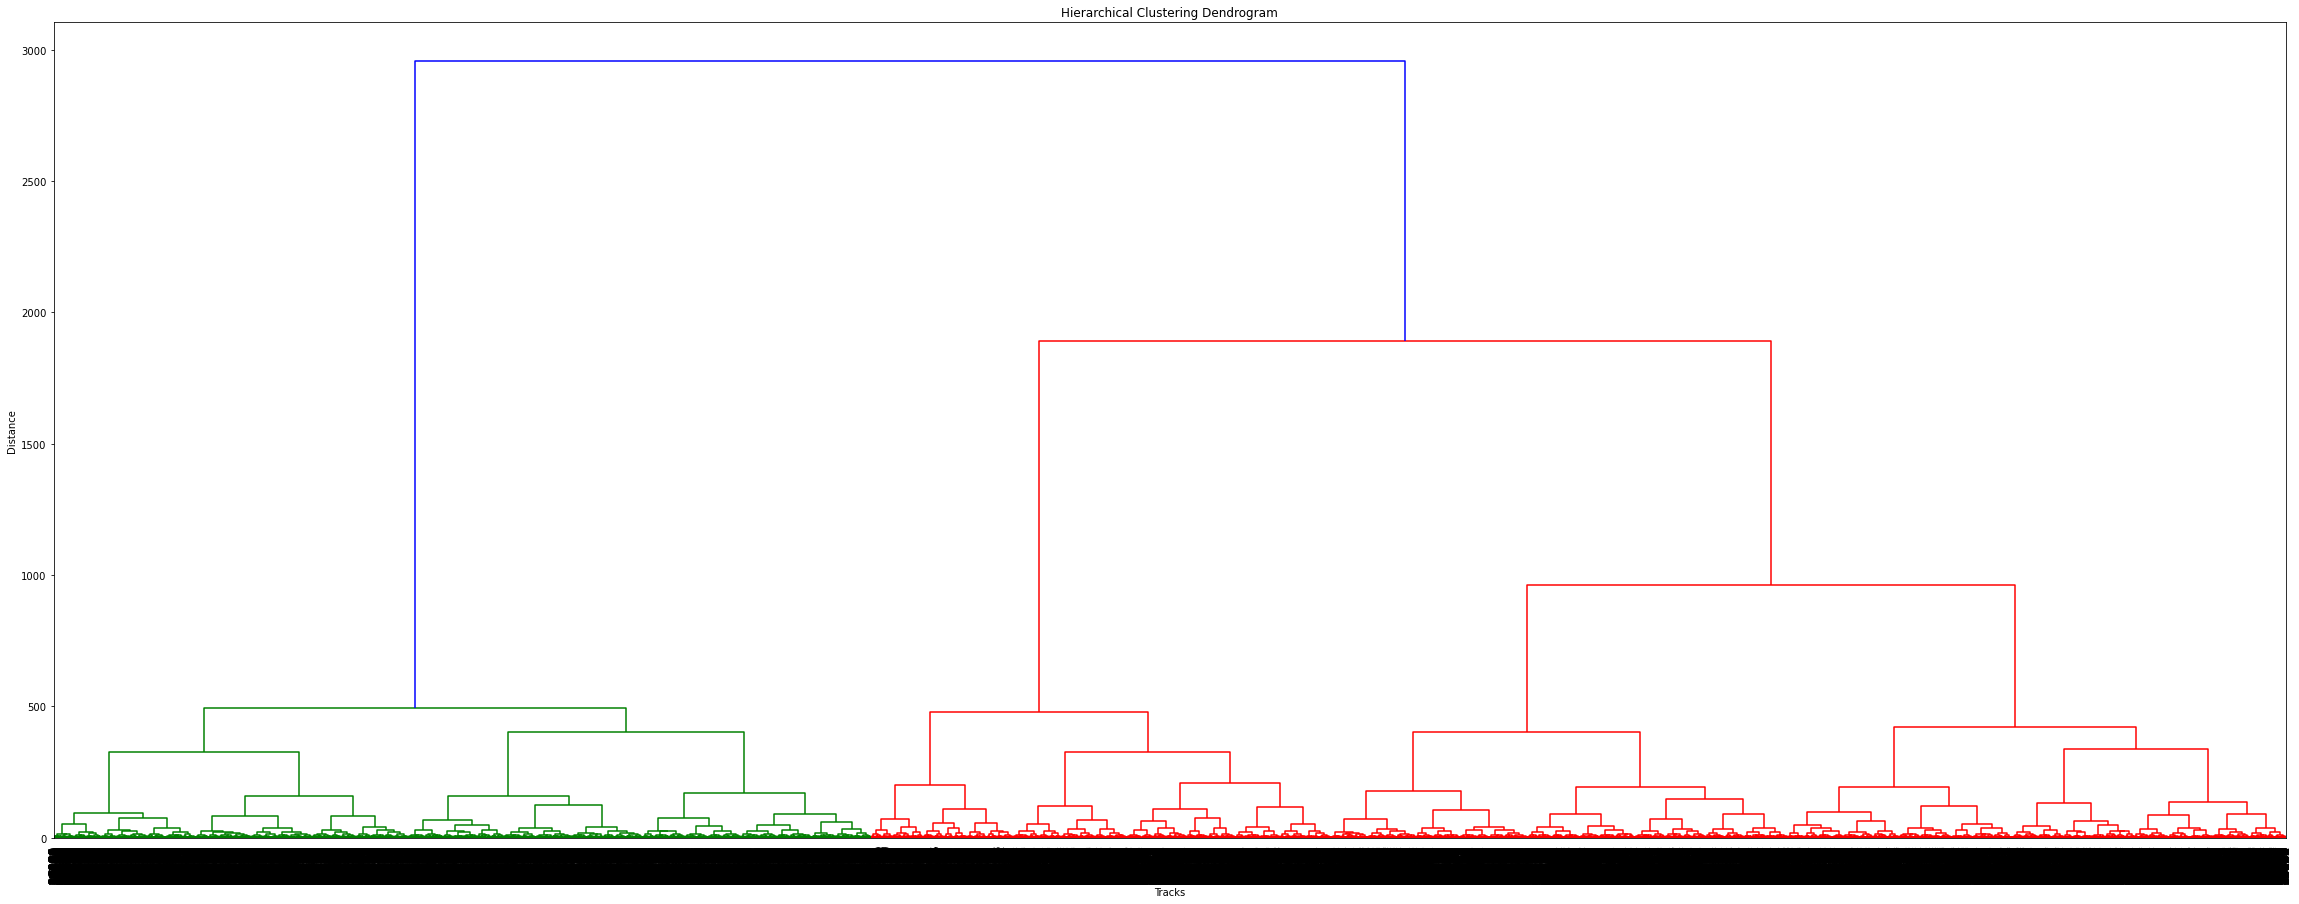

In [20]:
plt.figure(figsize=(40, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
plt.xticks([])
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

From the dendogram above, there may be anywhere from 3-12 clusters to try out.

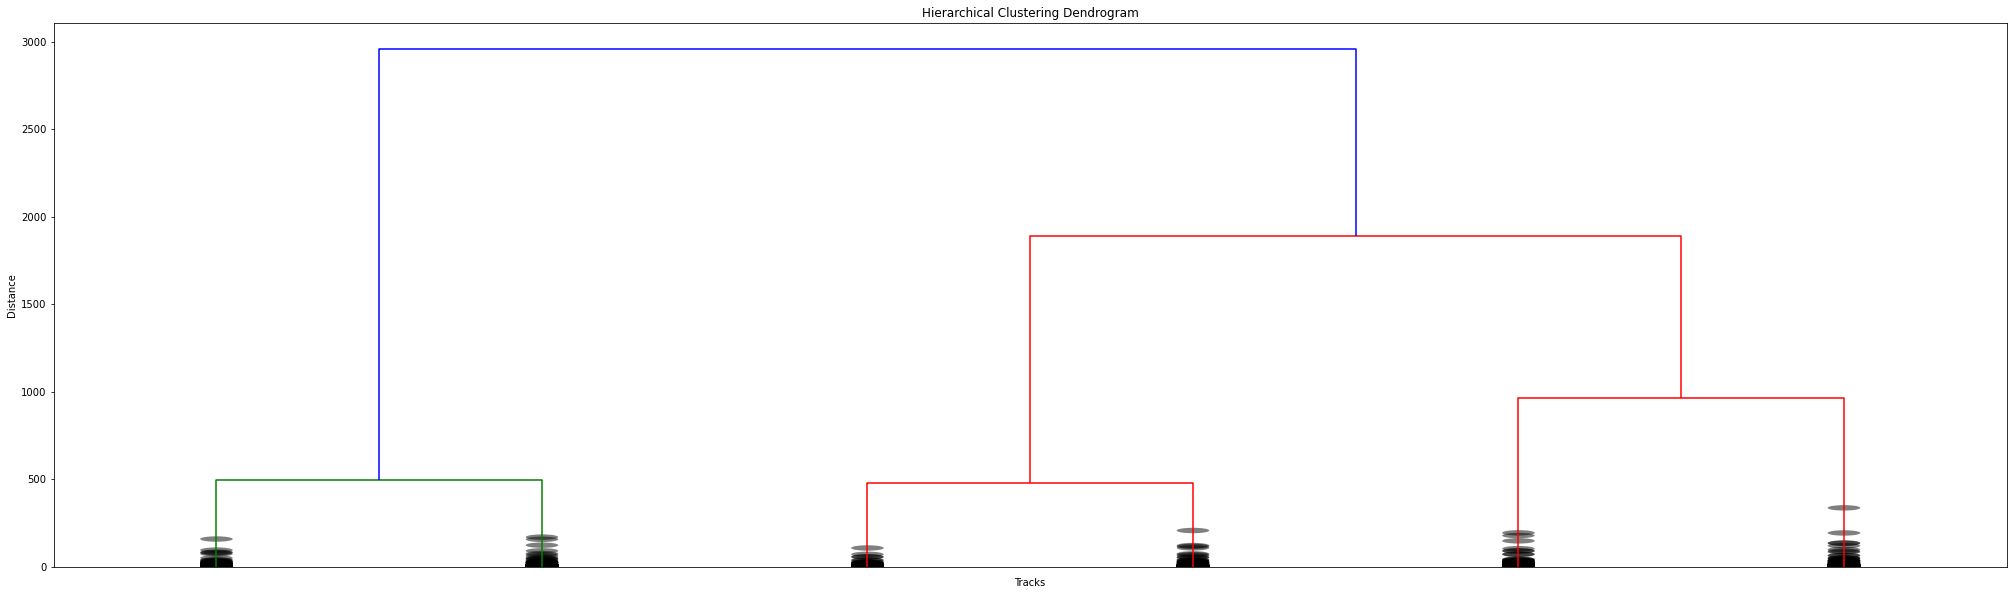

In [21]:
# truncated dendograme
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

In [22]:
# construct dendogram in scipy, link with 'complete' linkage
Y = linkage(model_df_pop, method = 'complete')

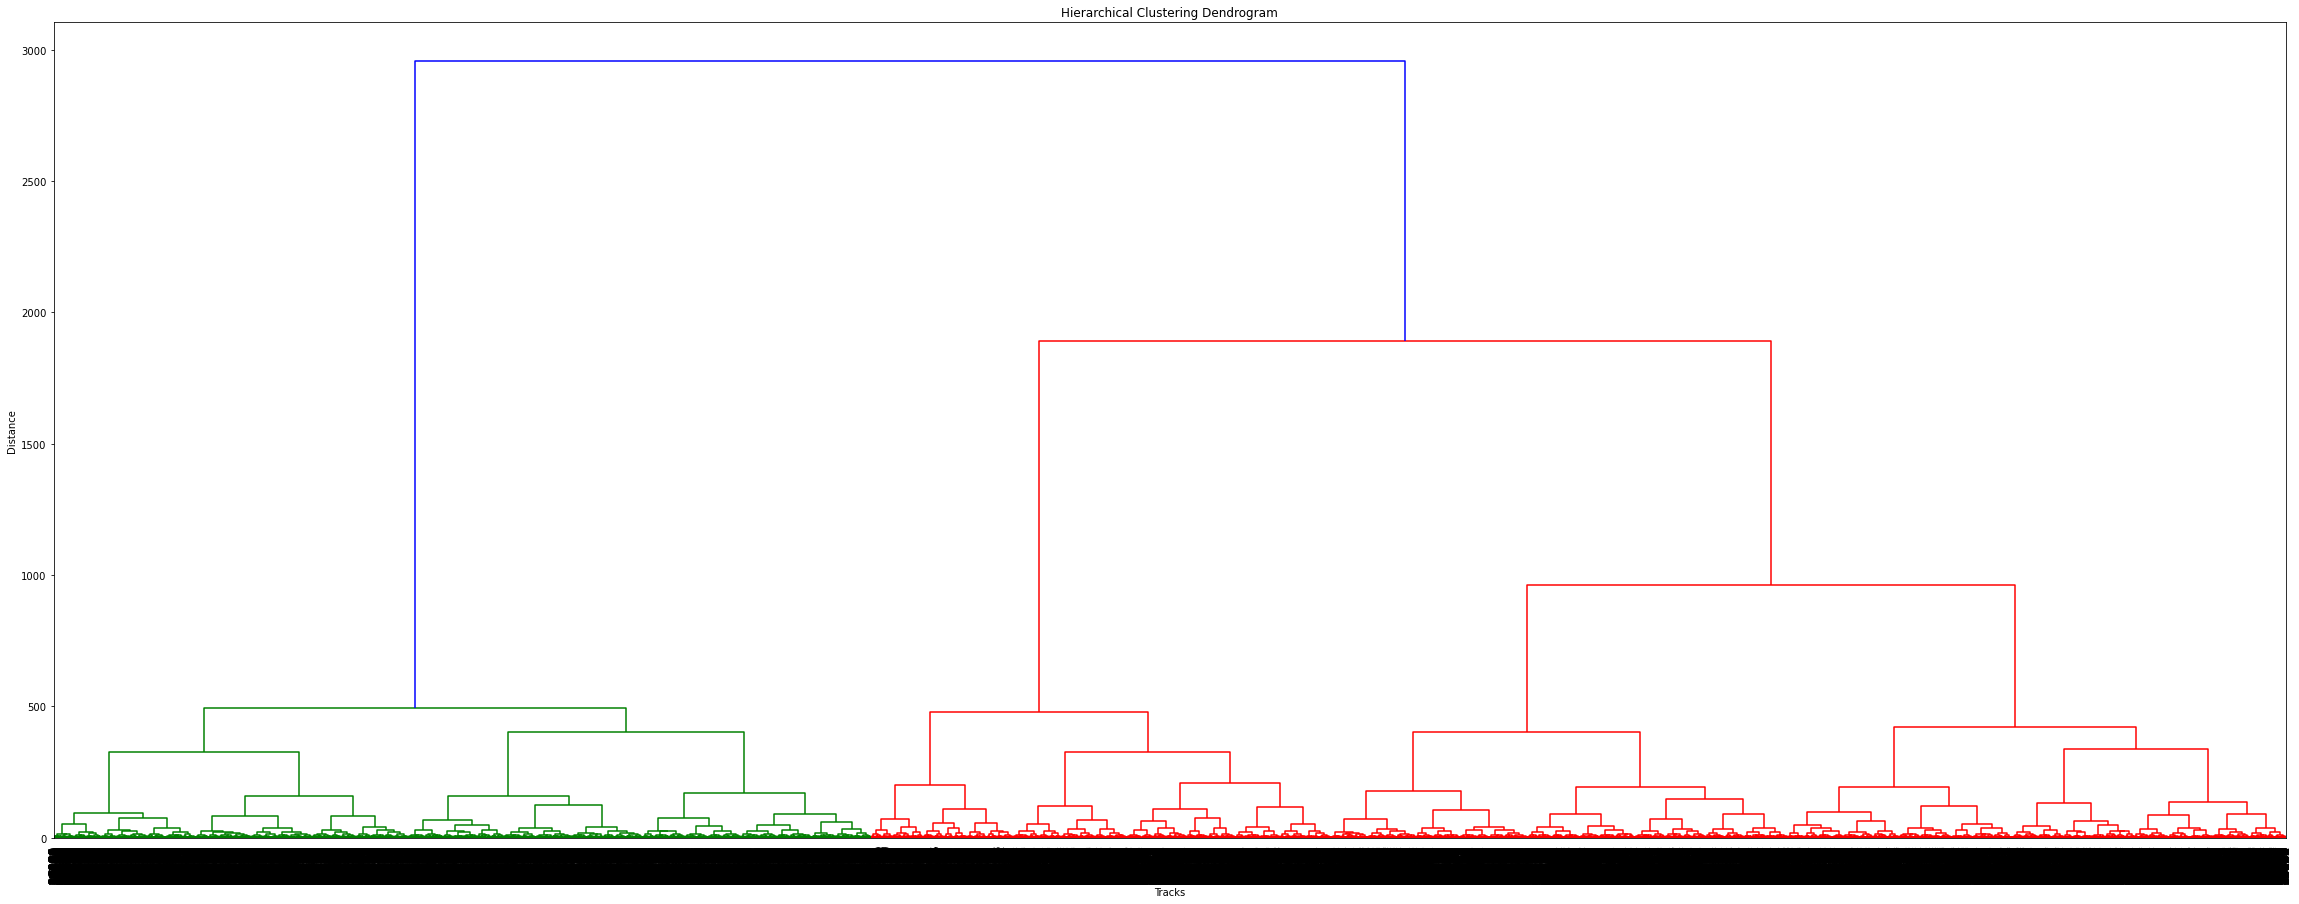

In [23]:
plt.figure(figsize=(40, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
plt.xticks([])
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

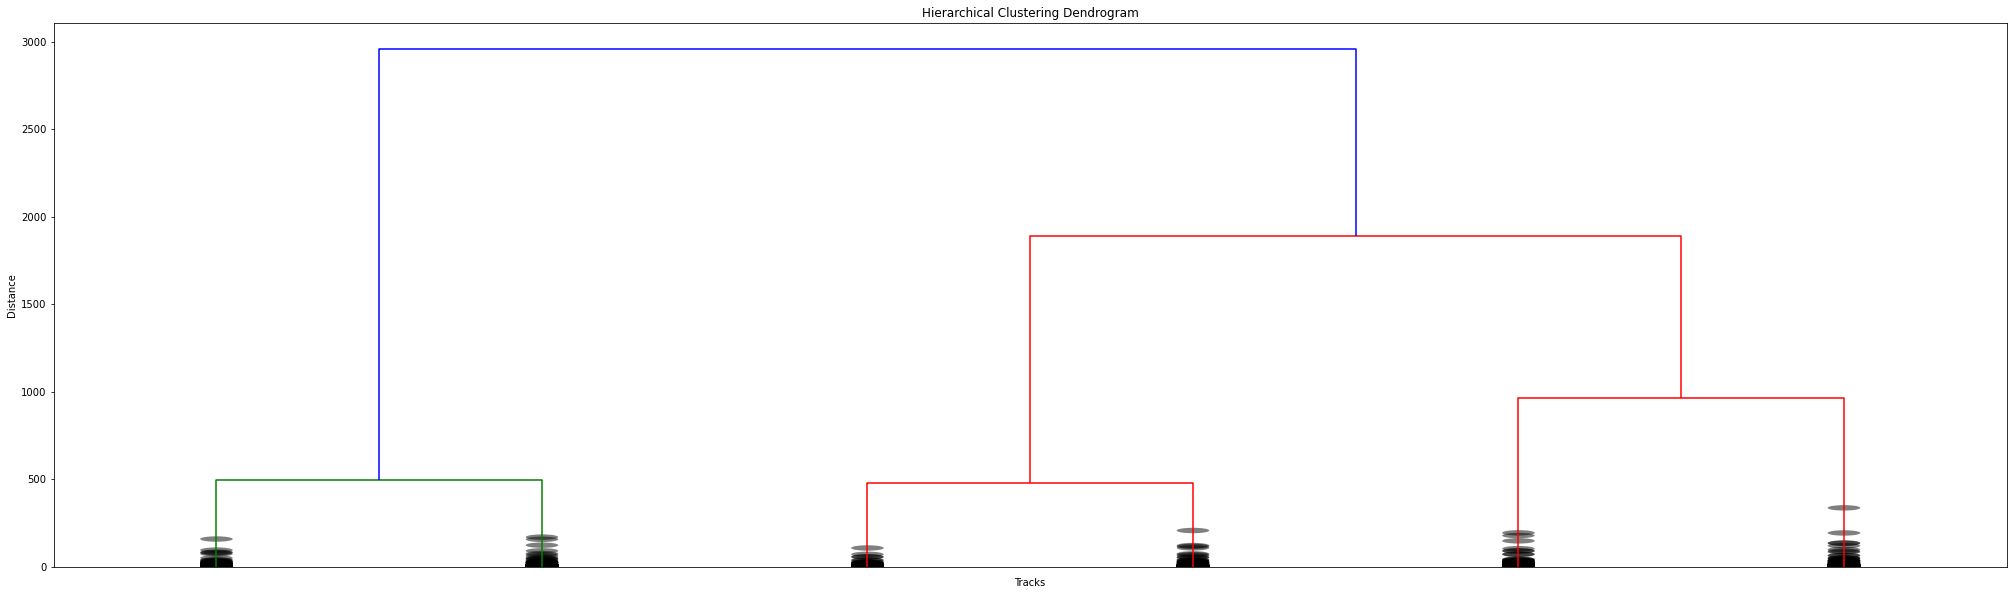

In [24]:
# truncated dendograme
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)
plt.show()

Using different linkages resulted in pretty much the same dendogram. Below we'll redo this clustering using scikit-learn and try 5 and 6 clusters as the different stopping points and evaluate.

### Agglomerative Clustering: 6 Clusters ###

In [26]:
# instantiation model with 6 clusters and fit the model on data
cluster6 = AgglomerativeClustering(n_clusters=6).fit(model_df_pop)

In [42]:
# create dataframe to hold cluster info
cluster6_df = pd.DataFrame()
cluster6_df['track_id'] = pop_df.track_id
cluster6_df['name'] = pop_df.name
cluster6_df['artists'] = pop_df.artists
cluster6_df['genre'] = pop_df.genre
cluster6_df['cluster'] = cluster6.labels_

# distribution of clusters
print('Distribution of Clusters:')
print(cluster6_df.cluster.value_counts(normalize=True))

# print silhoette and variance ratio
print("Silhoette Score:", silhouette_score(model_df_pop, cluster6_df.cluster))

Distribution of Clusters:
0    0.222984
2    0.207484
1    0.204439
4    0.158926
3    0.143014
5    0.063153
Name: cluster, dtype: float64
Silhoette Score: 0.27681282822958675


The silhoette score isn't that great. At least it is positive and approaching 1. Maybe less cluster might be better.

### Agglomerative Clustering: 5 Clusters ###

In [28]:
# instantiation model with 6 clusters and fit the model on data
cluster5 = AgglomerativeClustering(n_clusters=5).fit(model_df_pop)

In [77]:
# create dataframe to hold cluster info
cluster5_df = pd.DataFrame()
cluster5_df['track_id'] = pop_df.track_id
cluster5_df['name'] = pop_df.name
cluster5_df['artists'] = pop_df.artists
cluster5_df['genre'] = pop_df.genre
cluster5_df['cluster'] = cluster5.labels_

# distribution of clusters
print('Distribution of Clusters:')
print(cluster5_df.cluster.value_counts(normalize=True))

# print silhoette and variance ratio
print("Silhoette Score:", silhouette_score(model_df_pop, cluster5_df.cluster))

Distribution of Clusters:
1    0.222984
2    0.207484
0    0.206167
3    0.204439
4    0.158926
Name: cluster, dtype: float64
Silhoette Score: 0.3110766246467748


Less clusters did seem to result in a better silhoette score. Although it was not that big of an improvement. Let's analyze these priliminary results below.

### Prilimary Analysis ###

What are the top genres that make up each cluster? This way we can get a sense of what is being clustered together. 

In [79]:
cluster5_df.genre[1]

"['album rock', 'art rock', 'blues rock', 'brill building pop', 'bubblegum pop', 'classic rock', 'country rock', 'folk', 'folk rock', 'hard rock', 'heartland rock', 'mellow gold', 'rock', 'roots rock', 'soft rock']"

In [80]:
# remove quotes around list
import ast
cluster5_df.genre = cluster5_df.genre.apply(ast.literal_eval)

In [112]:
# what genres make up cluster 0?
cluster5_df[cluster5_df.cluster == 0].explode('genre').genre.value_counts(normalize=True)[:10]

mellow gold     0.049360
soft rock       0.048154
dance rock      0.042051
rock            0.040355
new wave pop    0.036771
folk rock       0.036491
art rock        0.035809
classic rock    0.032662
new wave        0.030826
album rock      0.029182
Name: genre, dtype: float64

In [113]:
# what genres make up cluster 1?
cluster5_df[cluster5_df.cluster == 1].explode('genre').genre.value_counts(normalize=True)[:10]

pop rock            0.040822
rock                0.031475
alternative rock    0.030297
new wave pop        0.028280
dance pop           0.025883
dance rock          0.025084
permanent wave      0.020870
new wave            0.020850
soft rock           0.019932
mellow gold         0.019193
Name: genre, dtype: float64

In [114]:
# what genres make up cluster 2?
cluster5_df[cluster5_df.cluster == 2].explode('genre').genre.value_counts(normalize=True)[:10]

pop              0.112333
pop rap          0.067863
rap              0.051263
dance pop        0.050288
post-teen pop    0.038744
hip hop          0.032683
trap             0.028022
modern rock      0.022387
indie pop        0.021230
electropop       0.019067
Name: genre, dtype: float64

In [117]:
# what genres make up cluster 3?
cluster5_df[cluster5_df.cluster == 3].explode('genre').genre.value_counts(normalize=True)[:10]

dance pop             0.043256
pop rock              0.035185
pop rap               0.034614
pop                   0.030543
pop punk              0.027687
hip hop               0.024973
rap                   0.024354
urban contemporary    0.022592
r&b                   0.021045
hip pop               0.019735
Name: genre, dtype: float64

In [124]:
# what genres make up cluster 4?
cluster5_df[cluster5_df.cluster == 4].explode('genre').genre.value_counts(normalize=True)[:10]

pop              0.072430
dance pop        0.055726
pop rap          0.047977
post-teen pop    0.035096
rap              0.032203
hip hop          0.029895
modern rock      0.024660
pop rock         0.022283
indie pop        0.021905
pop punk         0.020768
Name: genre, dtype: float64

We can start seeing some hints at groups that are forming. For instance Cluster 0 seems to be focused on softer rock. Maybe this hints at pop music that has a lot of guitar in it? Cluster 3 seems to be picking up on more 'urban' sounding pop maybe there is more singing spoken word involved. Unfortunately, as the silhoette score suggests, the clusters are not as distinct as we would like them to be which we could see by the overlap of different genres. However, this may not be the strongest analysis either since each track is associeted with multiple genres.

## Initial Model: KMeans Clustering ##

Next, we try some KMeans clustering to see if the clusters are more well-defined. 

In [403]:
v_ratios = []
inertias = []
for k in tqdm(range(2,13)):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=1031)
    
    # Fit model to samples and get labels
    cluster_labels = model.fit_predict(model_df_pop)

    # Append metrics to list
    v_ratios.append(calinski_harabasz_score(model_df_pop, cluster_labels))
    inertias.append(model.inertia_)

100%|██████████| 11/11 [00:09<00:00,  1.21it/s]


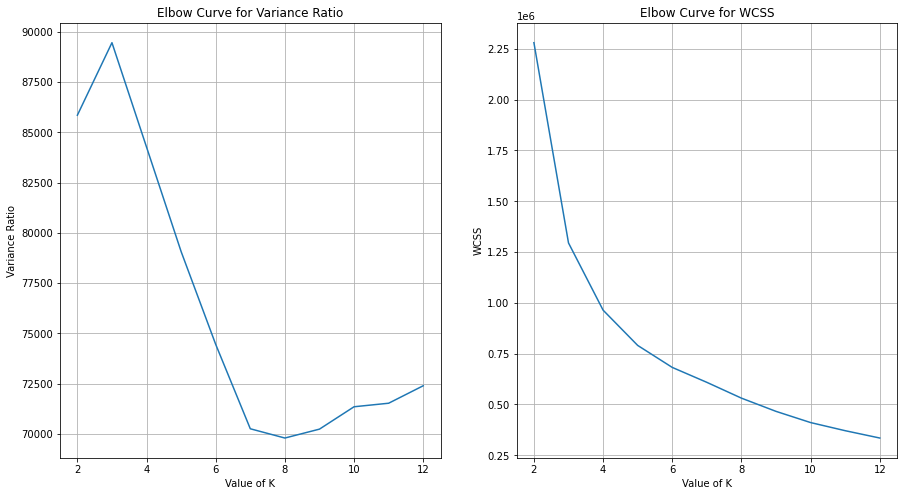

In [404]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

# plot variance ratio as function of K
axs[0].set_title('Elbow Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[0].plot(range(2, 13), v_ratios)
axs[0].grid(True)

# plot inertia as a function of k
axs[1].set_title('Elbow Curve for WCSS')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('WCSS')
axs[1].plot(range(2, 13), inertias)
axs[1].grid(True)

Based on both the variance ratio and distortion, it seems that the ideal number of clusters is 3.

In [193]:
# get labels when k=3
model3 = KMeans(n_clusters=3, random_state=1031)
model3.fit(model_df_pop)
print(model3.labels_)
print(calinski_harabasz_score(model_df_pop, model3.labels_))

[2 2 2 ... 1 1 1]
89456.34031076907


In [250]:
# create data frame with labels attached 
model3_df = pop_df.copy()
model3_df['cluster'] = model3.labels_

# distribution of clusters
print('Distribution of Clusters:')
print(model3_df.cluster.value_counts(normalize=True))

# print silhoette and variance ratio
print("Silhoette Score:", silhouette_score(model_df_pop, model3_df.cluster))

Distribution of Clusters:
1    0.395078
0    0.334367
2    0.270555
Name: cluster, dtype: float64
Silhoette Score: 0.4833079496080056


The silhoette score is much better than the previous two clustering attempts. Let's try to see the make up of each cluster.

### Analysis of KMeans Cluster ###

In [251]:
# remove unnecessay quotes from genre column
model3_df.genre = model3_df.genre.apply(ast.literal_eval)

In [279]:
# let's see some summary stats for each cluster
model3_df.groupby('cluster').mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,is_pop
cluster,,,,,,,,,,,,,,,,
0,0.226894,0.578561,244698.117164,0.654503,0.123974,0.049539,5.276666,0.189897,-7.855082,0.689120,47.485888,0.078556,121.575674,0.546350,1998.661716,True
1,0.225170,0.612370,224928.997292,0.657007,0.279008,0.028066,5.168947,0.186773,-6.464699,0.648774,58.772169,0.096963,122.322489,0.475309,2013.645788,True
2,0.322591,0.559612,244584.151186,0.581906,0.003853,0.073088,5.192659,0.190955,-10.805526,0.737579,37.427905,0.049159,121.752082,0.600479,1980.750760,True


Notes:
- cluster 2 is the most accoustic nearly .10 higher than both other groups
- cluster 1 is the most danceable
- cluster 2 is the least energetic .07 points less than groups 0 and 1
- cluster 1 has the most explicit tracks, cluster 2 has the least
- cluster 1 is the least instrumental, cluster 2 is the most
- cluster 1 is the least loud, cluster2 is the most
- cluster 1 has the least amount of tracks that are in major key, cluster 2 has the most.
- cluster 1 is the most speechy, cluster 2 is the least
- interestly, cluster 1 has the lowest valence score, while cluster 2 has the highest.

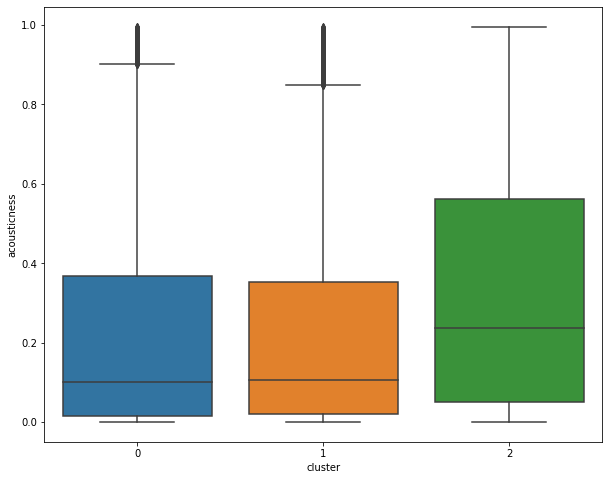

In [306]:
plt.figure(figsize=(10,8))
sns.boxplot(model3_df.cluster, model3_df.acousticness)

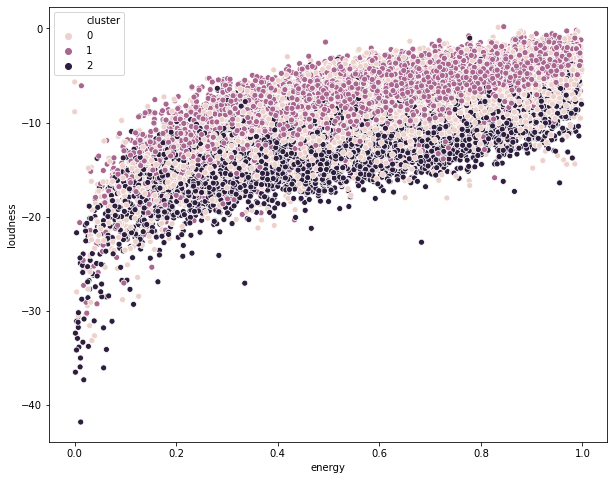

In [296]:
plt.figure(figsize=(10,8))
sns.scatterplot(model3_df.energy, model3_df.loudness, hue=model3_df.cluster)

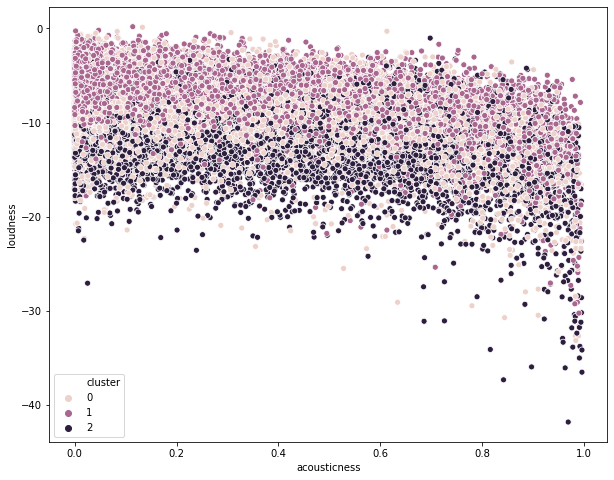

In [307]:
plt.figure(figsize=(10,8))
sns.scatterplot(model3_df.acousticness, model3_df.loudness, hue=model3_df.cluster)

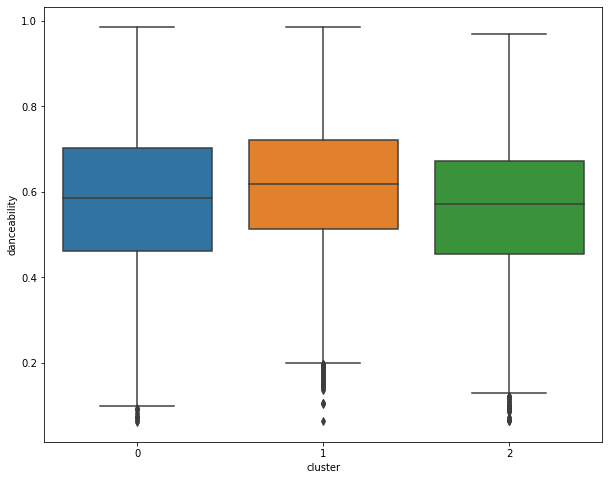

In [308]:
plt.figure(figsize=(10,8))
sns.boxplot(model3_df.cluster, model3_df.danceability)

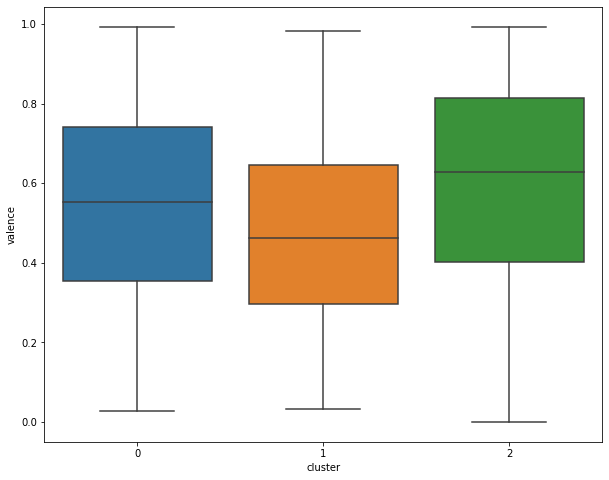

In [309]:
plt.figure(figsize=(10,8))
sns.boxplot(model3_df.cluster, model3_df.valence)

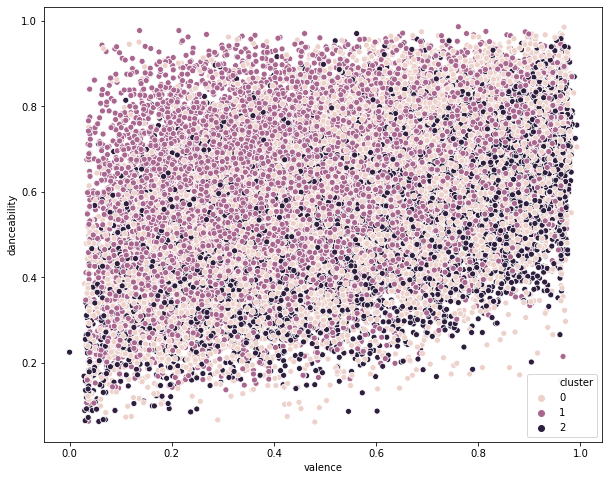

In [311]:
plt.figure(figsize=(10,8))
sns.scatterplot(model3_df.valence, model3_df.danceability, hue=model3_df.cluster)

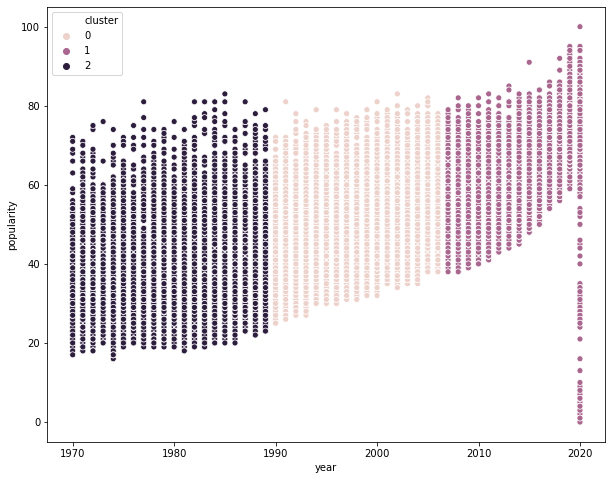

In [303]:
plt.figure(figsize=(10,8))
sns.scatterplot(model3_df.year, model3_df.popularity, hue=model3_df.cluster)

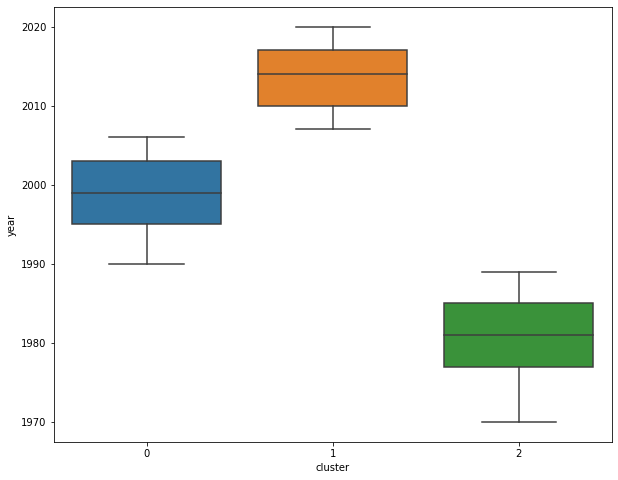

In [316]:
plt.figure(figsize=(10,8))
sns.boxplot(model3_df.cluster, model3_df.year)

Interestingly, year seems to be the biggest feature used to determine whether a whether a track belongs to a certain cluster. Is this because songs from these years sound the most similar? Is the algorithm relying to heavily on year to form these clusters? Below we run another KMeans cluster but remove year as a feature.

## KMeans Clustering with Year Removed ##

In [318]:
# remove year
no_year = model_df_pop.drop('year', axis=1)

In [322]:
v_ratios = []
inertias = []
for k in tqdm(range(2,13)):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=1031)
    
    # Fit model to samples and get labels
    cluster_labels = model.fit_predict(no_year)

    # Append metrics to list
    v_ratios.append(calinski_harabasz_score(no_year, cluster_labels))
    inertias.append(model.inertia_)

100%|██████████| 11/11 [00:05<00:00,  2.08it/s]


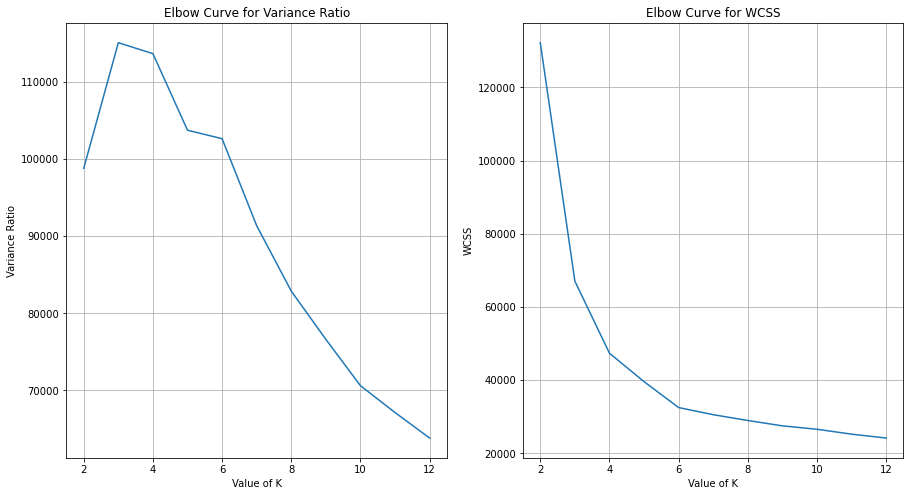

In [402]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

# plot variance ratio as function of K
axs[0].set_title('Elbow Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[0].plot(range(2, 13), v_ratios)
axs[0].grid(True)

# plot inertia as a function of k
axs[1].set_title('Elbow Curve for WCSS')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('WCSS')
axs[1].plot(range(2, 13), inertias)
axs[1].grid(True)

Running the algorithm again produces different results. The best variance ratios are much higher now and there is less of a difference in variance ratios between 3 and 4 groups compared to when the model was ran with year included. Moreoever, the WCSS is overall much lower. There is great decrease in WCSS from 3 to 4 groups. Since the variance ratio is about the same between 3 and 4 groups but WCSS is lower for 4 groups, we'll choose 4 groups to cluster our data. Still it may be worth testing the validity of both numbers.

In [340]:
# create data frame using 3 groups
model = KMeans(n_clusters=3, random_state=1031)
model.fit(no_year)

# create data frame with labels attached 
df3 = pop_df.copy()
df3['cluster'] = model.labels_
# remove unnecessay quotes from genre column
df3.genre = df3.genre.apply(ast.literal_eval)

# distribution of clusters
print('Distribution of Clusters:')
print(df3.cluster.value_counts(normalize=True))

# print silhoette score
print("Silhoette Score:", silhouette_score(no_year, df3.cluster))

Distribution of Clusters:
1    0.354805
0    0.338811
2    0.306384
Name: cluster, dtype: float64
Silhoette Score: 0.5255406024680923


In [341]:
# create data frame using 4 groups
model = KMeans(n_clusters=4, random_state=1031)
model.fit(no_year)

# create data frame with labels attached 
df4 = pop_df.copy()
df4['cluster'] = model.labels_
# remove unnecessay quotes from genre column
df4.genre = df4.genre.apply(ast.literal_eval)

# distribution of clusters
print('Distribution of Clusters:')
print(df4.cluster.value_counts(normalize=True))

# print silhoette score
print("Silhoette Score:", silhouette_score(no_year, df4.cluster))

Distribution of Clusters:
1    0.326136
2    0.244602
0    0.238375
3    0.190886
Name: cluster, dtype: float64
Silhoette Score: 0.4704509013701737


### Analysis of 3-Cluster and 4-Cluster Results ###

**3-Cluster Group**

In [375]:
# let's see some summary stats for each cluster
df3.groupby('cluster').mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,is_pop
cluster,,,,,,,,,,,,,,,,
0,0.262503,0.583829,236466.563401,0.630035,0.137085,0.047925,5.615951,0.192819,-8.228798,0.661862,49.027126,0.075354,121.428970,0.535425,1999.306802,True
1,0.249441,0.586226,237156.576046,0.634365,0.157736,0.048775,1.123869,0.188156,-8.087799,0.771979,49.291812,0.076954,122.193545,0.523290,1999.882394,True
2,0.243689,0.590722,236941.617568,0.644003,0.164219,0.045315,9.497493,0.185587,-7.984851,0.614076,49.361927,0.081728,122.141173,0.541328,2000.040115,True


It seems the the main difference between the groups is the mean key of the songs. There also appears to be quite a difference in mode with songs in with tracks in cluster 1 tending to in Major scale more often than songs in cluster 0 or 2.

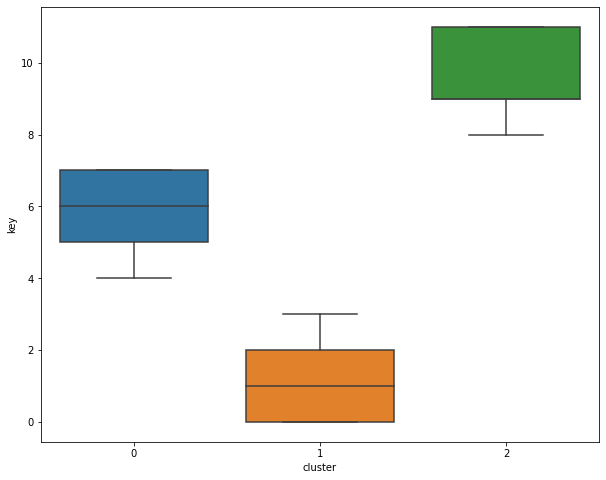

In [367]:
plt.figure(figsize=(10,8))
sns.boxplot(df3.cluster, df3.key)

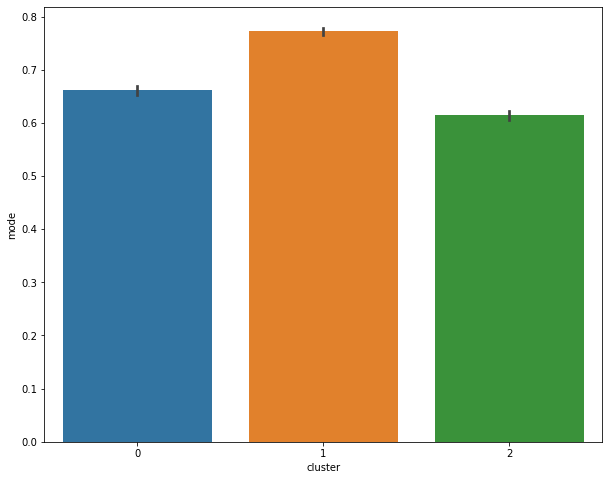

In [368]:
plt.figure(figsize=(10,8))
sns.barplot(df3.cluster, df3['mode'])

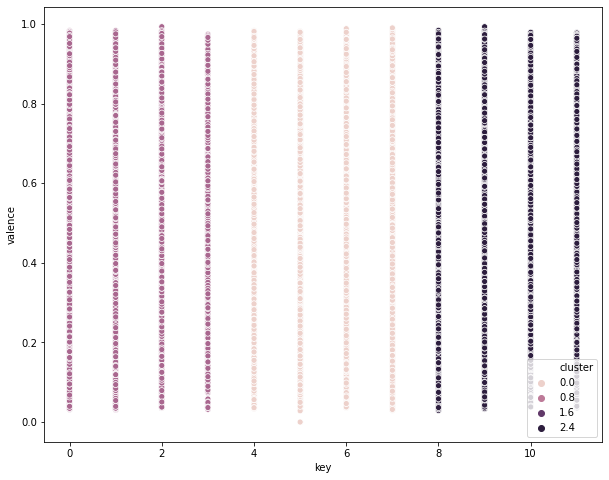

In [373]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.key, df3.valence, hue=df3.cluster)

**4-Cluster Group**

In [377]:
# let's see some summary stats for each cluster
df4.groupby('cluster').mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,is_pop
cluster,,,,,,,,,,,,,,,,
0,0.244148,0.591767,236481.822880,0.638160,0.163770,0.046655,6.997238,0.187093,-7.968442,0.731385,49.822534,0.082640,121.450710,0.535416,2000.548855,True
1,0.242540,0.589309,237367.990495,0.637558,0.160077,0.048994,0.958950,0.189864,-8.067536,0.780451,49.239822,0.077927,122.188826,0.525955,1999.808294,True
2,0.244555,0.589217,237368.090736,0.644039,0.155002,0.046258,9.875729,0.188212,-8.093202,0.578174,48.711754,0.079675,122.170109,0.544871,1999.252467,True
3,0.288056,0.573170,235797.199483,0.619559,0.123455,0.047210,4.269761,0.190649,-8.349572,0.607646,49.103909,0.069527,121.718141,0.526430,1999.215435,True


Main difference between groups again is the key of the song. Modality also seems to be different across groups with tracks inclusters 0 and 1 using a Major scale more often

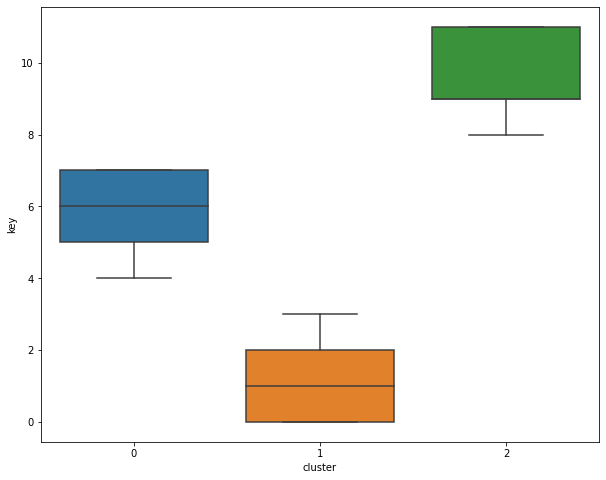

In [384]:
plt.figure(figsize=(10,8))
sns.boxplot(df3.cluster, df3.key)

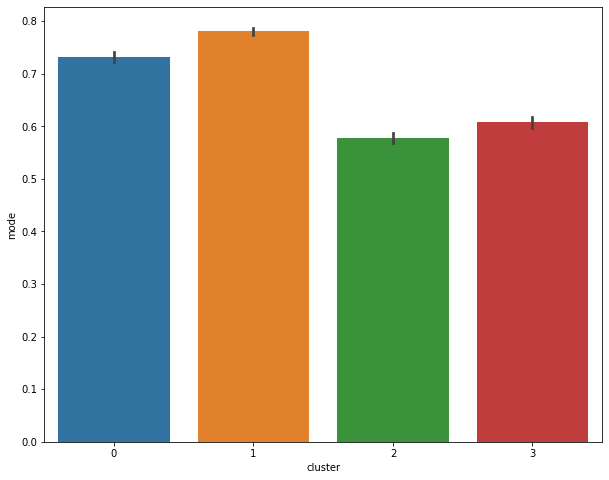

In [383]:
plt.figure(figsize=(10,8))
sns.barplot(df4.cluster, df4['mode'])

It seems the the algorithm is still splitting on a categorical variable. This time with year removed, it is creating clusters based on key. This could be because I did not scale this feature originally since it was categorical. Below, we scale the features again and remove year as a feature.


## Final Model ##

The final model removes year as a feature and scales key along with all other numerical features.

In [411]:
# continuous numerical features
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                'popularity', 'speechiness', 'tempo', 'valence', 'key']

# cateogrical features
cat_features = ['explicit', 'mode']

In [412]:
# separate numerical vs categorical features
num_df = pop_df.set_index('track_id')[num_features]
cat_df = pop_df.set_index('track_id')[cat_features]
# scale the numerical data to be between 0 and 1 since most of the features are already in that range 
scaler = MinMaxScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(num_df)
# create new data frame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=num_df.index, columns=num_df.columns)
# merge scaled features with the categorical features
model_df_final = scaled_df.merge(cat_df, left_index=True, right_index=True)

In [419]:
v_ratios = []
inertias = []
for k in tqdm(range(2,13)):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=1031)
    
    # Fit model to samples and get labels
    cluster_labels = model.fit_predict(model_df_final)

    # Append metrics to list
    v_ratios.append(calinski_harabasz_score(model_df_final, cluster_labels))
    inertias.append(model.inertia_)

100%|██████████| 11/11 [00:10<00:00,  1.08it/s]


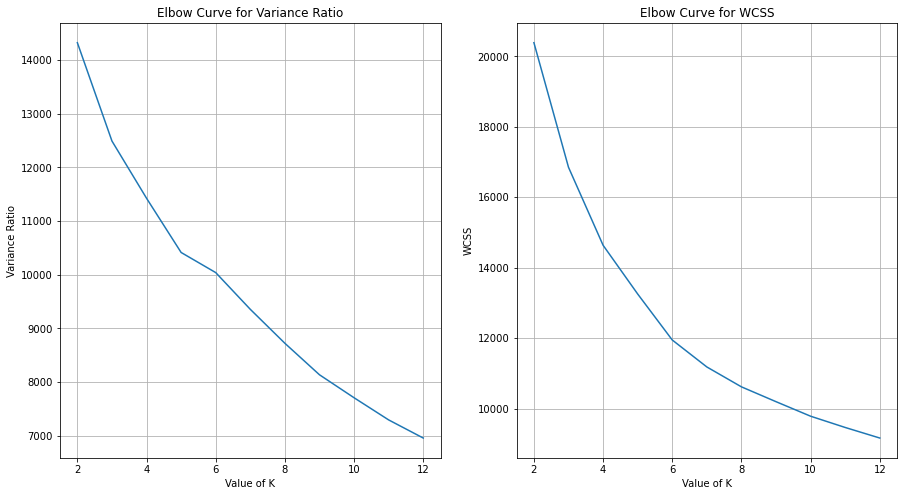

In [420]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

# plot variance ratio as function of K
axs[0].set_title('Elbow Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[0].plot(range(2, 13), v_ratios)
axs[0].grid(True)

# plot inertia as a function of k
axs[1].set_title('Elbow Curve for WCSS')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('WCSS')
axs[1].plot(range(2, 13), inertias)
axs[1].grid(True)

In [427]:
# create data frame using 2 groups
model = KMeans(n_clusters=2, random_state=1031)
model.fit(model_df_final)

# create data frame with labels attached 
df2 = pop_df.copy()
df2['cluster'] = model.labels_
# remove unnecessay quotes from genre column
df2.genre = df2.genre.apply(ast.literal_eval)

# distribution of clusters
print('Distribution of Clusters:')
print(df2.cluster.value_counts(normalize=True))

# print silhoette score
print("Silhoette Score:", silhouette_score(model_df_final, df2.cluster))

Distribution of Clusters:
1    0.686291
0    0.313709
Name: cluster, dtype: float64
Silhoette Score: 0.3092972067429892


In [430]:
df2.groupby('cluster').mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,is_pop
cluster,,,,,,,,,,,,,,,,
0,0.222875,0.610501,243043.767731,0.654903,0.208133,0.047211,5.939397,0.190023,-7.732449,0.0,50.696371,0.092717,121.275861,0.538101,2001.571054,True
1,0.265465,0.575954,234028.883794,0.627142,0.127398,0.047526,4.878598,0.188458,-8.273881,1.0,48.550408,0.071090,122.212186,0.530563,1998.896746,True


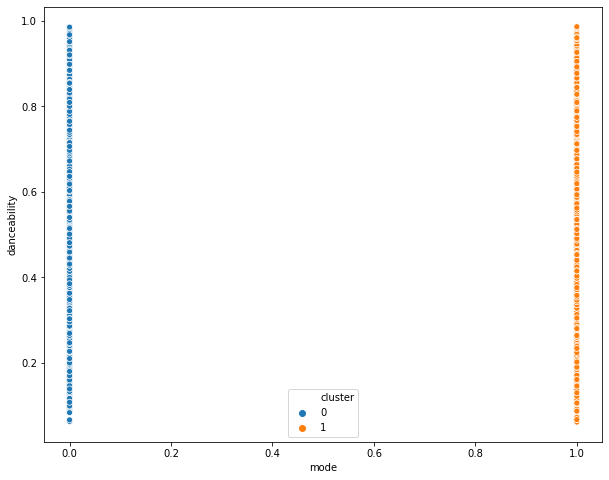

In [445]:
plt.figure(figsize=(10,8))
sns.scatterplot(df2['mode'], df2.danceability, hue=df2.cluster)

From the above, we can see that the algorithm is clustering based on modality of the track.

## Summary ##

Again, we are seeeing that the algorithm is using the categorical values to do the clustering. This is not ideal. First it was splitting by release year, then by key, and now by modality of the track. These clusters are not nuanced enough to provide good meaning. The algorithm may not equipped to deal with a mix of numeric and caterical variables. 

**Bonus: Try to cluster without using categorical variables**

In [451]:
# continuous numerical features
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                'popularity', 'speechiness', 'tempo', 'valence']

# cateogrical features
cat_features = ['explicit', 'key', 'mode', 'year']

In [466]:
from sklearn.preprocessing import StandardScaler

# separate numerical vs categorical features
num_df = pop_df.set_index('track_id')[num_features]
# scale the numerical data to be between 0 and 1 since most of the features are already in that range 
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(num_df)
# create new data frame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=num_df.index, columns=num_df.columns)

In [467]:
v_ratios = []
inertias = []
for k in tqdm(range(2,13)):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples and get labels
    cluster_labels = model.fit_predict(scaled_df)

    # Append metrics to list
    v_ratios.append(calinski_harabasz_score(scaled_df, cluster_labels))
    inertias.append(model.inertia_)

100%|██████████| 11/11 [00:18<00:00,  1.66s/it]


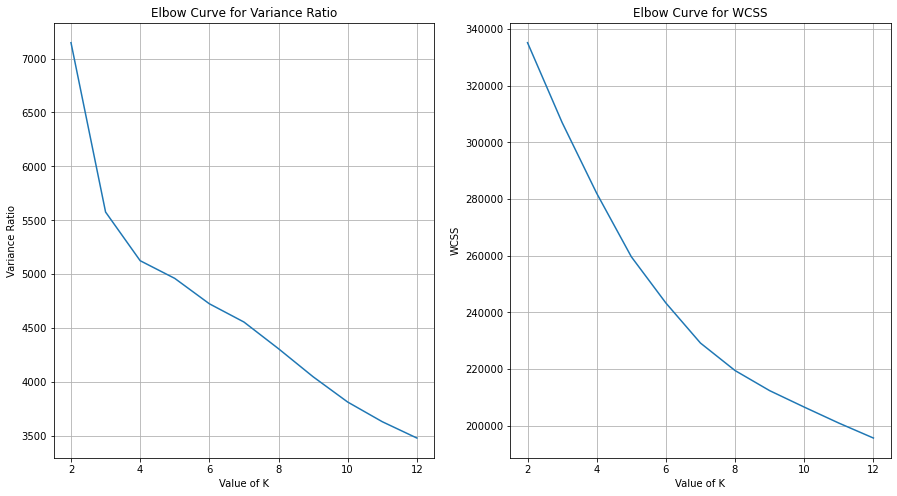

In [468]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

# plot variance ratio as function of K
axs[0].set_title('Elbow Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[0].plot(range(2, 13), v_ratios)
axs[0].grid(True)

# plot inertia as a function of k
axs[1].set_title('Elbow Curve for WCSS')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('WCSS')
axs[1].plot(range(2, 13), inertias)
axs[1].grid(True)

These results are also not promising.